## 1. Cities in Sweden - create dataset (*)

Create this DataFrame from scratch: 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Malmö     |       347949 |
|  1 | Stockholm |       975551 |
|  2 | Uppsala   |       233839 |
|  3 | Göteborg  |       583056 |

&nbsp; a) Use your DataFrame to print out all the cities. (*)

In [76]:
import pandas as pd 

df = pd.DataFrame(dict( Kommun = ["Malmö" , "Stockholm" , "Uppsala","Göteborg"], Population = [347949 ,975551 ,233839,583056]), index = [0,1,2,3])


df

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


&nbsp; b) Select only the row which contains Göteborg. Do this by using the name Göteborg. (*)

In [77]:
gothenburg = df.loc[[3]]

gothenburg

,Kommun,Population
3,Göteborg,583056


&nbsp; c) Sort the cities by population from largest to smallest. (*)


In [78]:
df_sorted = df.sort_values(by=["Population"],axis=0,ascending=False)

df_sorted

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


&nbsp; d) Filter out the three largest cities. (*)

In [79]:
df_largest3 = df_sorted.iloc[:3]

df_largest3

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949


&nbsp; e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city. 

In [80]:
sweden_total_population = 10379295

new_column=[round(row["Population"]*100/sweden_total_population,2)  for index,row in df_sorted.iterrows() ]

df_sorted["Percentage"]= new_column



df_sorted

,Kommun,Population,Percentage
1,Stockholm,975551,9.40
3,Göteborg,583056,5.62
0,Malmö,347949,3.35
2,Uppsala,233839,2.25


## 2. Cities in Sweden - real dataset (*)

Go into [this page][scb_pop50], scroll down and download the Excel file containing Swedish population dataset from SCB.

[scb_pop50]: https://www.scb.se/hitta-statistik/statistik-efter-amne/befolkning/befolkningens-sammansattning/befolkningsstatistik/pong/tabell-och-diagram/topplistor-kommuner/folkmangd-topp-50/

&nbsp; a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

```python
df.head()
df.info()
df.describe()
```

Feel free to do more explorations. (*)

&nbsp; b) Clean your data so that the head looks like this: (*)


|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
|  0 |          83 |          84 | Ale      |            31868 |            31402 |     1.48398  |
|  1 |          64 |          64 | Alingsås |            41602 |            41420 |     0.439401 |
|  2 |         123 |         123 | Alvesta  |            20224 |            20134 |     0.447005 |
|  3 |         255 |         255 | Aneby    |             6821 |             6848 |    -0.394276 |
|  4 |         169 |         167 | Arboga   |            14039 |            14087 |    -0.34074  |



In [81]:
df = pd.read_excel("files/komtopp50_2020.xlsx", sheet_name="Totalt")

#df.head()
#df.info()
df.describe()

#df.head()

,Unnamed: 1,Unnamed: 4
count,291.000000,291.000000
mean,151.934708,35496.934708
std,138.092769,74190.464321
min,1.000000,2019.000000
25%,73.500000,10005.000000
50%,146.000000,15940.000000
75%,218.500000,35649.500000
max,2019.000000,974073.000000


In [82]:
df = pd.read_excel("files/komtopp50_2020.xlsx", sheet_name="Totalt")

df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Folkmängd per kommun 31 december 2020 jämfört ...,NaN,NaN,NaN,NaN,NaN
2,Sorterat i alfabetisk ordning. Rangordning frå...,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Folkmängd 31 december,NaN,Förändring
...,...,...,...,...,...,...
291,54,55.0,Österåker,46644,45574.0,2.34783
292,116,115.0,Östhammar,22251,22250.0,0.004494
293,160,159.0,Östra Göinge,15017,15007.0,0.066636
294,284,284.0,Överkalix,3289,3315.0,-0.784314


In [83]:
df = df.drop([0,1,2,3,4])



new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header



In [84]:
df.columns = ["Rang 2020","Rang 2019","Kommun","Folkmängd 2020","Folkmängd 2019","Förändring"]

df.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
6,83,84.0,Ale,31868,31402.0,1.483982
7,64,64.0,Alingsås,41602,41420.0,0.439401
8,123,123.0,Alvesta,20224,20134.0,0.447005
9,255,255.0,Aneby,6821,6848.0,-0.394276
10,169,167.0,Arboga,14039,14087.0,-0.34074


In [85]:
df = df.sort_values(by="Kommun")

df.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
6,83,84.0,Ale,31868,31402.0,1.483982
7,64,64.0,Alingsås,41602,41420.0,0.439401
8,123,123.0,Alvesta,20224,20134.0,0.447005
9,255,255.0,Aneby,6821,6848.0,-0.394276
10,169,167.0,Arboga,14039,14087.0,-0.34074


In [86]:

kommuner = df["Kommun"].unique().__len__()

df.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
6,83,84.0,Ale,31868,31402.0,1.483982
7,64,64.0,Alingsås,41602,41420.0,0.439401
8,123,123.0,Alvesta,20224,20134.0,0.447005
9,255,255.0,Aneby,6821,6848.0,-0.394276
10,169,167.0,Arboga,14039,14087.0,-0.34074


&nbsp; c) Sort the cities by population from largest to smallest. (*)


In [87]:
df = df.sort_values(by="Folkmängd 2020",ascending=False).reset_index(drop=True)

df 

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,1,1.0,Stockholm,975551,974073.0,0.151734
1,2,2.0,Göteborg,583056,579281.0,0.65167
2,3,3.0,Malmö,347949,344166.0,1.099179
3,4,4.0,Uppsala,233839,230767.0,1.331213
4,5,5.0,Linköping,164616,163051.0,0.959822
...,...,...,...,...,...,...
285,286,286.0,Åsele,2805,2794.0,0.393701
286,287,287.0,Arjeplog,2718,2785.0,-2.405745
287,288,288.0,Dorotea,2498,2551.0,-2.077617
288,289,289.0,Sorsele,2442,2489.0,-1.888309


&nbsp; d) Filter out the five smallest cities. (*)

In [88]:
x = len(df)-5
y = len(df)-1

df_minus_last_five = df[:]
df_minus_last_five.drop(df.loc[x:y].index, inplace=True)

df_minus_last_five.tail()

/Users/Sami/.local/share/virtualenvs/Databehandling-SAMI-FATMI-JnSYw4fk/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
280,281,281.0,Norsjö,3945,3986.0,-1.0286
281,282,282.0,Ydre,3726,3747.0,-0.560448
282,283,283.0,Munkfors,3725,3740.0,-0.40107
283,284,284.0,Överkalix,3289,3315.0,-0.784314
284,285,285.0,Malå,3024,3068.0,-1.434159


&nbsp; e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. (*)



In [89]:
df["Folkmängd 2019"].sum()

10327589.0

In [90]:
df["Folkmängd 2020"].sum()

10379295

&nbsp; f) Plot a bar chart for the five largest cities and the five smallest cities. (*) 

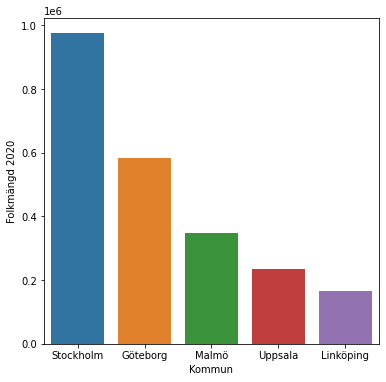

In [155]:
import matplotlib.pyplot as plt
#import pyplot_express as px
import nbformat as nbf
import seaborn as sns

top5 = df.head()

plt.figure(figsize=(6,6))

sns.barplot(x=top5["Kommun"],y=top5["Folkmängd 2020"] )

plt.show()




## 3. Cities in Sweden - gender (*)

We continue with the same Excel-file as in task 2, but now you should also read in the sheets "Kvinnor" and "Män" into two additional DataFrames. In this task, many operations are similar to all three datasets, try creating custom made functions to reuse as much code as possible.

&nbsp; a) Clean your data so that the head looks like this: (*)

Male: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 |          81 |          83 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 |          64 |          64 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|  2 |         122 |         123 | Alvesta  |            10367 |            10339 |     0.270819 | Man   |
|  3 |         255 |         255 | Aneby    |             3503 |             3498 |     0.142939 | Man   |
|  4 |         169 |         168 | Arboga   |             7094 |             7114 |    -0.281136 | Man   |

Female: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:-------|
|  0 |          84 |          85 | Ale      |            15612 |            15348 |     1.72009  | Kvinna |
|  1 |          64 |          64 | Alingsås |            20900 |            20774 |     0.606527 | Kvinna |
|  2 |         123 |         123 | Alvesta  |             9857 |             9795 |     0.632976 | Kvinna |
|  3 |         255 |         255 | Aneby    |             3318 |             3350 |    -0.955224 | Kvinna |
|  4 |         165 |         164 | Arboga   |             6945 |             6973 |    -0.401549 | Kvinna |

In [92]:
def drop_columns(df,min,max):
    number_list = [ i for i in range(min,max+1)]
    df = df.drop(number_list)
    return df

def replace_columns(df,column_list):
    df.columns = column_list
    return df

def add_columns(df,column_name,column_constant_value):
    column = [ column_constant_value for _ in range(len(df))]
    df[column_name] = column
    return df

male_df = pd.read_excel("files/komtopp50_2020.xlsx", sheet_name="Män")
male_df = drop_columns(male_df,0,5)
replace_columns(male_df,["Rang 2020","Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"])
add_columns(male_df,"Kön","Män")

female_df = pd.read_excel("files/komtopp50_2020.xlsx", sheet_name="Kvinnor")
female_df = drop_columns(female_df,0,5)
replace_columns(female_df,["Rang 2020","Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"])
add_columns(female_df,"Kön","Kvinna")

female_df.reset_index(drop = True)

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,84,85.0,Ale,15612,15348.0,1.720094,Kvinna
1,64,64.0,Alingsås,20900,20774.0,0.606527,Kvinna
2,123,123.0,Alvesta,9857,9795.0,0.632976,Kvinna
3,255,255.0,Aneby,3318,3350.0,-0.955224,Kvinna
4,165,164.0,Arboga,6945,6973.0,-0.401549,Kvinna
...,...,...,...,...,...,...,...
285,55,57.0,Österåker,22997,22442.0,2.473042,Kvinna
286,117,118.0,Östhammar,10846,10803.0,0.398038,Kvinna
287,160,159.0,Östra Göinge,7270,7262.0,0.110162,Kvinna
288,284,284.0,Överkalix,1559,1578.0,-1.204056,Kvinna



&nbsp; b) Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now.  (*)

|    | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|   ...  | ...       | ...  | ...   | ...  | ...    |
| 288 | Överkalix    |             1559 |             1578 |    -1.20406  | Kvinna |
| 289 | Övertorneå   |             2027 |             2065 |    -1.84019  | Kvinna |

In [93]:
total_df = male_df.append(female_df)

total_df = total_df.drop(columns=["Rang 2020","Rang 2019"])\

total_df

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
6,Ale,16256,16054.0,1.258253,Män
7,Alingsås,20702,20646.0,0.271239,Män
8,Alvesta,10367,10339.0,0.270819,Män
9,Aneby,3503,3498.0,0.142939,Män
10,Arboga,7094,7114.0,-0.281136,Män
...,...,...,...,...,...
291,Österåker,22997,22442.0,2.473042,Kvinna
292,Östhammar,10846,10803.0,0.398038,Kvinna
293,Östra Göinge,7270,7262.0,0.110162,Kvinna
294,Överkalix,1559,1578.0,-1.204056,Kvinna


&nbsp; c) Extract and change column name from the total DataFrame so that the head look like this: (*) 

|    | Kommun   |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|---:|:---------|-----------------:|-----------------:|-------------------:|
|  0 | Ale      |            31868 |            31402 |           1.48398  |
|  1 | Alingsås |            41602 |            41420 |           0.439401 |
|  2 | Alvesta  |            20224 |            20134 |           0.447005 |
|  3 | Aneby    |             6821 |             6848 |          -0.394276 |
|  4 | Arboga   |            14039 |            14087 |          -0.34074  |

In [101]:
new_df = df.drop(columns=["Rang 2020","Rang 2019"])

new_df.sort_values(by="Kommun")

new_df.columns = ["Kommun","Total Pop 2020","Total Pop 2019","Total förändring"]

new_df

,Kommun,Total Pop 2020,Total Pop 2019,Total förändring
0,Stockholm,975551,974073.0,0.151734
1,Göteborg,583056,579281.0,0.65167
2,Malmö,347949,344166.0,1.099179
3,Uppsala,233839,230767.0,1.331213
4,Linköping,164616,163051.0,0.959822
...,...,...,...,...
285,Åsele,2805,2794.0,0.393701
286,Arjeplog,2718,2785.0,-2.405745
287,Dorotea,2498,2551.0,-2.077617
288,Sorsele,2442,2489.0,-1.888309


&nbsp; d) Merge this data with the data in b) so that the head look like this: (*)

| Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|:----------|-----------------:|-----------------:|-------------:|:-------|-----------------:|-----------------:|-------------------:|
| Stockholm |           482982 |           482220 |     0.158019 | Man    |           975551 |           974073 |           0.151734 |
| Stockholm |           492569 |           491853 |     0.145572 | Kvinna |           975551 |           974073 |           0.151734 |
| Göteborg  |           292505 |           290308 |     0.756782 | Man    |           583056 |           579281 |           0.65167  |
| Göteborg  |           290551 |           288973 |     0.546072 | Kvinna |           583056 |           579281 |           0.65167  |
| Malmö     |           175411 |           173543 |     1.07639  | Kvinna |           347949 |           344166 |           1.09918  |

In [126]:
final_df = pd.merge(total_df,new_df,on="Kommun")

final_df = final_df.set_index("Kommun")

final_df


,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring
Kommun,,,,,,,
Ale,16256,16054.0,1.258253,Män,31868,31402.0,1.483982
Ale,15612,15348.0,1.720094,Kvinna,31868,31402.0,1.483982
Alingsås,20702,20646.0,0.271239,Män,41602,41420.0,0.439401
Alingsås,20900,20774.0,0.606527,Kvinna,41602,41420.0,0.439401
Alvesta,10367,10339.0,0.270819,Män,20224,20134.0,0.447005
...,...,...,...,...,...,...,...
Östra Göinge,7270,7262.0,0.110162,Kvinna,15017,15007.0,0.066636
Överkalix,1730,1737.0,-0.402994,Män,3289,3315.0,-0.784314
Överkalix,1559,1578.0,-1.204056,Kvinna,3289,3315.0,-0.784314


&nbsp; e) Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities. (*) 

Text(0.5, 1.0, '10 smallest cities')

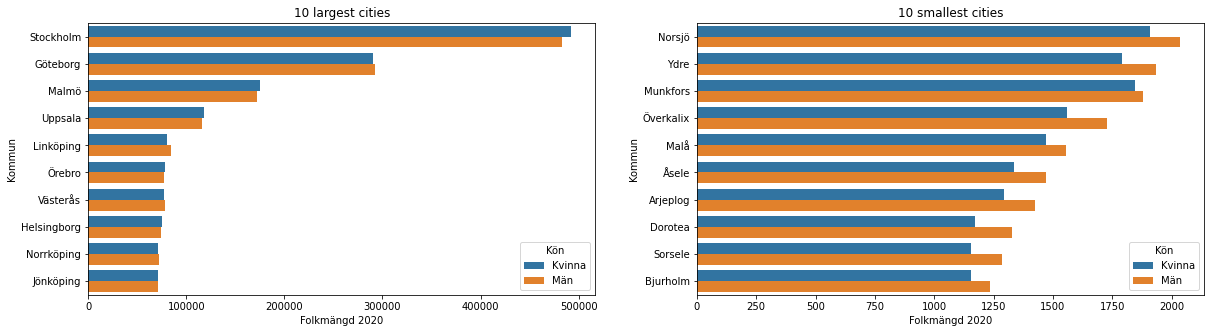

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

final_df = final_df.sort_values(by="Total Pop 2020",ascending=False)

sns.barplot(ax=axes[0], data=final_df[0:20], y=final_df[0:20].index, x="Folkmängd 2020", hue="Kön")
axes[0].set_title("10 largest cities")
sns.barplot(ax=axes[1], data=final_df[-20:], y=final_df[-20:].index, x="Folkmängd 2020", hue="Kön")
axes[1].set_title("10 smallest cities")

&nbsp; f) Create a pie chart showing the total male and female population in Sweden 2020. (*)


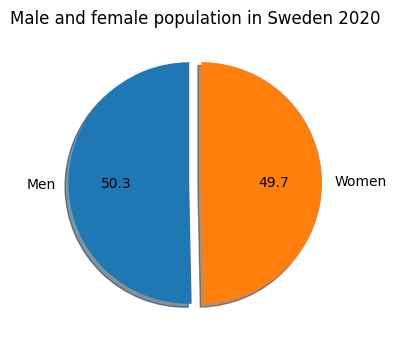

In [139]:
men = male_df["Folkmängd 2020"].sum()
women = female_df["Folkmängd 2020"].sum()

fig, ax = plt.figure(dpi=100, facecolor="white"), plt.axes()

ax.pie ((men, women), labels=("Men", "Women"), explode=(0.05, 0.05), startangle=90, frame= False, shadow=True, autopct= "%.1f")
ax.set_title("Male and female population in Sweden 2020");

&nbsp; g) Create a barplot showing the cities with the five largest percentual gender difference in 2020. (**)


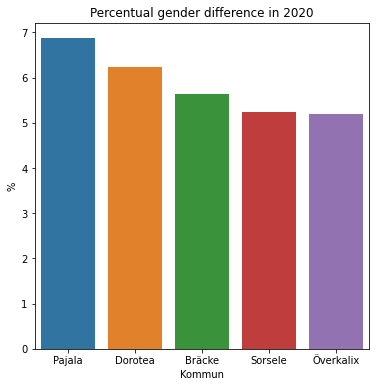

In [164]:
gender_difference = abs(final_df[final_df["Kön"]=="Män"]["Folkmängd 2020"] - final_df[final_df["Kön"]=="Kvinna"]["Folkmängd 2020"])*100/ final_df[final_df["Kön"]=="Män"]["Total Pop 2020"]

gender_difference= gender_difference.sort_values(ascending=False)

plt.figure(figsize=(6,6))

sns.barplot(x=gender_difference[:5].index , y= gender_difference[:5] )
plt.ylabel("%")
plt.title("Percentual gender difference in 2020")
plt.show()



&nbsp; h) Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020 (**)


<AxesSubplot:xlabel='Kommun'>

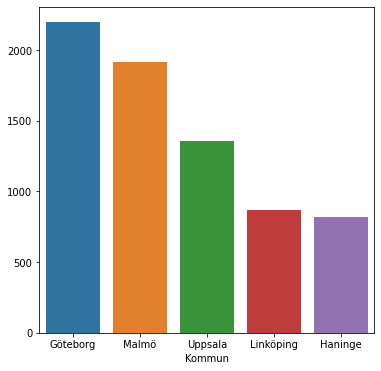

In [170]:

pop_growth = final_df[final_df["Kön"]=="Män"]["Folkmängd 2020"] - final_df[final_df["Kön"]=="Män"]["Folkmängd 2019"]

pop_growth = pop_growth.sort_values(ascending=False)

plt.figure(figsize=(6,6))

sns.barplot(x=pop_growth[:5].index,y=pop_growth[:5])

&nbsp; i) Feel free to investigate other questions you are interested in using these datasets. (*), (**)
